In [2]:
import pandas as pd

data=pd.read_csv('archive.zip', compression='zip')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data.drop(['CustomerID','Gender'], axis=1, inplace=True, errors='ignore')
data.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [4]:
def create_segment(Score):
  if Score <= 40:
    return 0
  elif Score <= 70:
    return 1
  else:
    return 2
data['final']=data['Spending Score (1-100)'].apply(create_segment)
data.head()

,Age,Annual Income (k$),Spending Score (1-100),final
0,19,15,39,0
1,21,15,81,2
2,20,16,6,0
3,23,16,77,2
4,31,17,40,0


In [5]:
x=data.drop('final',axis=1)
y=data['final']

In [6]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
data['Age']=scaler.fit_transform(data[['Age']])
data['Annual Income (k$)']=scaler.fit_transform(data[['Annual Income (k$)']])
data['Spending Score (1-100)  ']=scaler.fit_transform(data[['Spending Score (1-100)']])
data.head()

,Age,Annual Income (k$),Spending Score (1-100),final,Spending Score (1-100)
0,-1.424569,-1.738999,39,0,-0.434801
1,-1.281035,-1.738999,81,2,1.195704
2,-1.352802,-1.700830,6,0,-1.715913
3,-1.137502,-1.700830,77,2,1.040418
4,-0.563369,-1.662660,40,0,-0.395980


In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42, stratify=y)
print(y_train.value_counts())
print(y_test.value_counts())

final
1    66
0    51
2    43
Name: count, dtype: int64
final
1    17
0    12
2    11
Name: count, dtype: int64


In [8]:
from sklearn.neighbors import KNeighborsClassifier

k=[1,3,5,7,9]
accuracy=[]

for i in k:
  knn=KNeighborsClassifier(n_neighbors=i,metric='euclidean')
  knn.fit(x_train,y_train)
  accuracy.append(knn.score(x_test,y_test))

print(accuracy)

[0.95, 0.95, 0.925, 0.925, 0.925]


In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score

best_k = k[accuracy.index(max(accuracy))]
knn = KNeighborsClassifier(n_neighbors=best_k, metric='euclidean')
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

final_acc=accuracy_score(y_test,y_pred)
print("Final Accuracy:", final_acc)

Confusion Matrix:
 [[11  1  0]
 [ 0 16  1]
 [ 0  0 11]]
Final Accuracy: 0.95


In [10]:
import pandas as pd

new_customer = pd.DataFrame([[30, 70, 50]], columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])

predicted_segment = knn.predict(new_customer)
print(f"Predicted Segment: {predicted_segment[0]}")

Predicted Segment: 1


In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

model_scaler = StandardScaler()

x_train_scaled = model_scaler.fit_transform(x_train)

x_test_scaled = model_scaler.transform(x_test)

knn_scaled = KNeighborsClassifier(n_neighbors=best_k, metric='euclidean')
knn_scaled.fit(x_train_scaled, y_train)

import pandas as pd

new_customer = pd.DataFrame([[30, 70, 50]],
                            columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
new_customer_scaled = model_scaler.transform(new_customer) # Use the correctly fitted scaler

predicted_segment_scaled = knn_scaled.predict(new_customer_scaled)
print(f"Predicted Segment for scaled new customer: {predicted_segment_scaled[0]}")

Predicted Segment for scaled new customer: 1


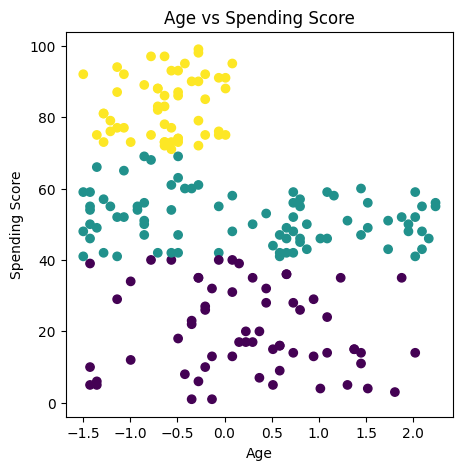

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.scatter(data['Age'], data['Spending Score (1-100)'], c=data['final'], cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('Age vs Spending Score')
plt.show()